# EDA of GDP in 6 countries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and exploring data

In [35]:
data = pd.read_csv('/Users/mikashaw/Downloads/Life-Expectancy-and-GDP-Starter/all_data.csv')

In [36]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [37]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [38]:
data.value_counts()

Country                   Year  Life expectancy at birth (years)  GDP         
Zimbabwe                  2015  60.7                              1.630467e+10    1
                          2014  59.2                              1.589105e+10    1
China                     2009  74.9                              5.109950e+12    1
                          2010  75.0                              6.100620e+12    1
                          2011  75.2                              7.572550e+12    1
                                                                                 ..
United States of America  2002  77.0                              1.100000e+13    1
                          2003  77.2                              1.150000e+13    1
                          2004  77.5                              1.230000e+13    1
                          2005  77.5                              1.310000e+13    1
Chile                     2000  77.3                              7.786093e+10   

In [39]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [40]:
data.isnull()

,Country,Year,Life expectancy at birth (years),GDP
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
91,False,False,False,False
92,False,False,False,False
93,False,False,False,False
94,False,False,False,False


In [44]:
data = data.rename(columns = {"Life expectancy at birth (years)": "life_expectancy"})

From this, we can conclude that this data has no null values, there are 6 different countries, and the data is collected over a period of 16 years.

# Visualizing data

<Figure size 432x288 with 0 Axes>

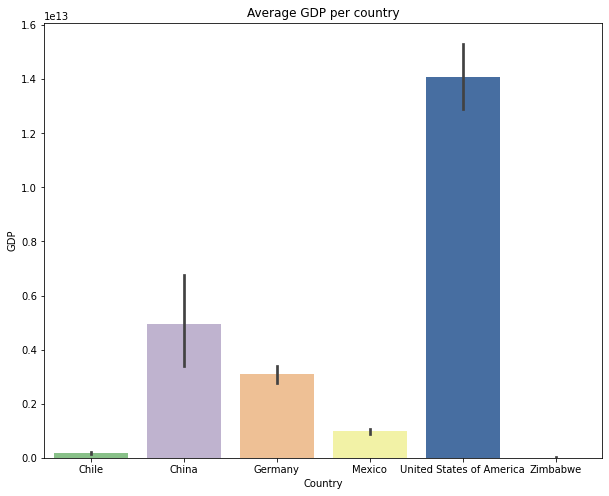

In [69]:
#now lets see the average GDP for each country

plt.clf()

f, ax = plt.subplots(figsize = (10,8))

sns.set_palette("Accent")

sns.barplot(data = data, x = 'Country', y = 'GDP')

ax.set_title("Average GDP per country")

plt.show()




Based on this graph, it is evident that Zimbabwe, Chile, and Mexico have relatively low GDP's

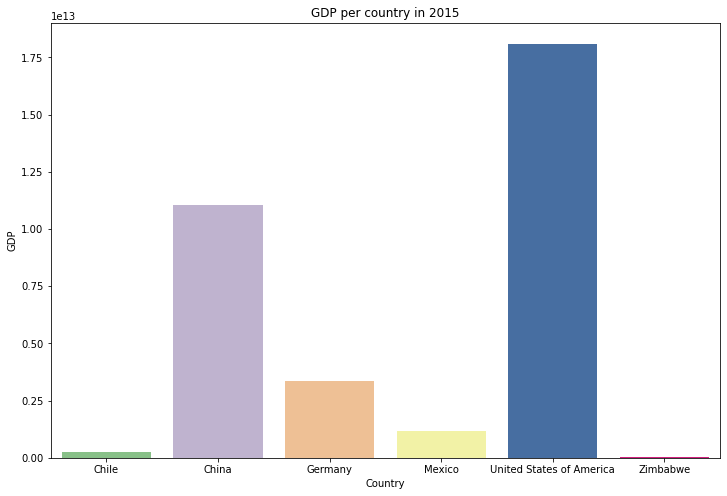

In [72]:
#now let's see the same graph, but with the MOST RECENT GDP's (2015)

recent_data = data[data.Year == 2015]

f, ax = plt.subplots(figsize = (12,8))

sns.barplot(data = recent_data, x = 'Country', y = 'GDP')

ax.set_title("GDP per country in 2015")

plt.show()


In this barplot, we can see that zimbabwe, china, and the USA's GDP is larger than that of the average over 15 years, wheras chile's remained the same, and Germany + Mexico's decreased.

<Figure size 432x288 with 0 Axes>

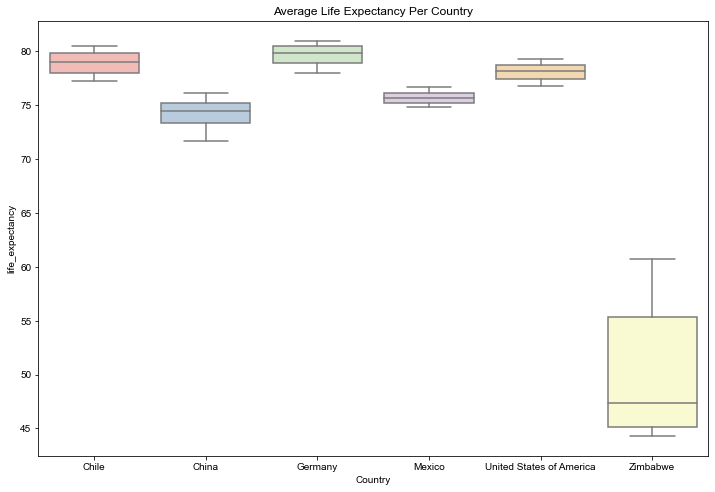

In [73]:
#Now lets compare countries and their respective life expectancies

plt.clf()

f, ax = plt.subplots(figsize = (12, 8))

sns.set_palette("Pastel1")

sns.set_style('darkgrid')

sns.boxplot(data = data, x = 'Country', y = 'life_expectancy')

ax.set_title("Average Life Expectancy Per Country")

plt.show()



This plot allows us to deduce that zimbabwe's life expectancy is significantly below that of the other countries. China, Chile, Germany, Mexico, and the USA have similar life expectancies

# Finding Correlations

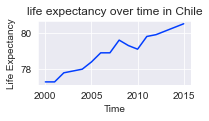

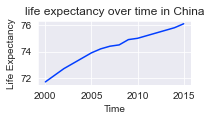

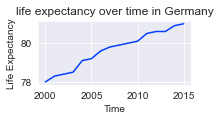

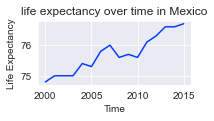

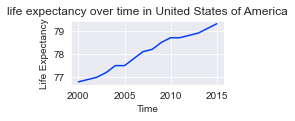

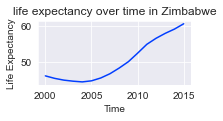

<Figure size 432x288 with 0 Axes>

In [76]:
#we will create an array of plots in order to visualize the data of disparate countries over time

countries = data.Country.unique()

#plt.figure(figsize = (20, 17))

for i in range(len(countries)):
    #f, ax = plt.subplots(figsize = (8,8))
    plt.subplot(3,2,i+1)
    plt.plot(data.Year[data.Country == countries[i]], data.life_expectancy[data.Country == countries[i]])
    plt.title("life expectancy over time in {}".format(countries[i]))
    plt.xlabel("Time")
    plt.ylabel("Life Expectancy")
    plt.show()
    
sns.set_palette("dark")
    
plt.subplots_adjust(wspace = 0.35, bottom = 0.1)


As we can see, there is a positive linear relationship between the year and life expectancy of a country

In [83]:
#now let's test the strength of the linear relationship

from scipy.stats import pearsonr

countries = data.Country.unique()

for i in range(len(countries)):
    col1 = data.Year[data.Country == countries[i]]
    col2 = data.life_expectancy[data.Country == countries[i]]
    corr_year_life, p = pearsonr(col1, col2)
    print(corr_year_life)


0.9805432853925485
0.9827338172654216
0.987376982327443
0.950451368252526
0.9923116465397318
0.9239243587092394


Based on these numbers, we can be certain that there is a STRONG linear relationship since the corr > 0.6

In [ ]:
#Now lets look at the relationship between Life Expectancy and GDP